In this lab we will cover the three themes that you saw during the course: **Validation, Reproducibility and Interpretability**.

The outline of this notebook is:
1. **Validation: general rules using the digits dataset**: In this section we will illustrate the main concepts of validation: performing cross-validation, choose relevant metrics and making sure our code is reproducible.
2. **Validation: specific rules to medical applications**: In this section, we will highlight cross-validation rules that are specific to medical applications.
3. **Interpretability**: In this section we provide some basic tools to interpret a model and external resources for in-depth information.
4. **[Optional]: Making your own functions/classes for cross-validation**: If you have some spare time, we strongly encourage you to implement yourself cross-validation schemes. We provide templates for several schemes and tests to check your implementations.

In this lab we will mostly use non-deep-learning algorithms to make the training phase faster and because the tools provided by scikit-learn to perform
cross validation are also often used when using deep learning algorithms. What you will learn is valid for machine learning in general, whether it is deep learning or not.

# 1. Validation: general rules using the digits dataset

In this section we will work on the [digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), which is quite similar to the famous MNIST but the images are smaller and the number of images is also smaller. Let's load it and have a look at some images.

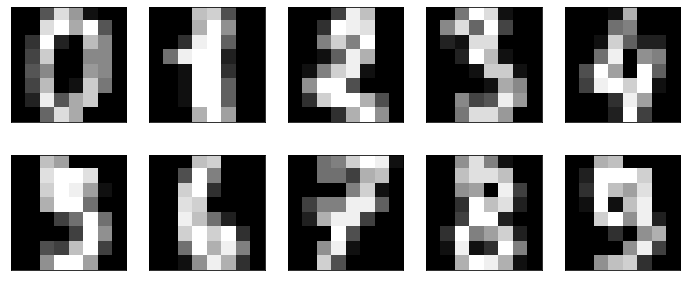

In [0]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Plot the first image for each class
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y == i][0].reshape(8, 8), cmap='gray')
    plt.xticks([])
    plt.yticks([])

## 1.1 Multiclass classification

First we will work on the 10-class classification task, that is predicting the digit given the image.

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Are the classes balanced? Compute the frequencies of each class.
  You can use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html">numpy.unique</a>
  or <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html">numpy.bincount</a>.
  Is the <i>accuracy</i> a relevant metric for this use case?
</div>

In [0]:
np.bincount(y) / len(y)

array([0.09905398, 0.10127991, 0.0984975 , 0.10183639, 0.10072343,
       0.10127991, 0.10072343, 0.09961046, 0.09682805, 0.10016694])

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Fit a classifier and evaluate its performance.
  If you are not familiar with <code>scikit-learn</code>, have
  a look at the <a href="https://scikit-learn.org/stable/modules/classes.html">API Reference</a> to choose a classifier,
  then at the documentation of this classifier to know how to use it.
</div>

Here is a quick example in case that you are not familiar with ``scikit-learn``:

```
from sklearn.svm import SVC  # Import the class defining the type of classifier
from sklearn.metrics import accuracy_score  # Import the function defining the metric used
clf = SVC()  # Define an instance of the class
clf.fit(X, y)  # Fit the classifier
y_pred = clf.predict(X)  # Get the predictions of the classifier for the given input data
clf.score(X, y)  # Compute directly the accuracy score for the given input data
accuracy_score(y, y_pred)  # Compute the accuracy score for the given predictions
```



In [0]:
from sklearn.svm import SVC  # Import the class defining the type of classifier
from sklearn.metrics import accuracy_score  # Import the function defining the metric used
clf = SVC()  # Define an instance of the class
clf.fit(X, y)  # Fit the classifier
y_pred = clf.predict(X)  # Get the predictions of the classifier for the given input data
clf.score(X, y)  # Compute directly the accuracy score for the given input data
accuracy_score(y, y_pred)

0.996661101836394

If you have a classifier that returns perfect predictions, you probably did not use cross-validation...

When you take an exam, are the questions the same as the ones from the exam of the previous year? You would love to, but it is not the case, **because the teacher wants to know what you learned, not if you are able to copy-paste**.

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Fit your model on a training set and evaluate its performance on the training set and the test set.
  You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn.model_selection.train_test_split</a>
  to split your dataset into a training set and a test set.
</div>

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X, y)
clf = SVC()  # Define an instance of the class
clf.fit(train_data, train_label)  # Fit the classifier
y_pred = clf.predict(test_data)  # Get the predictions of the classifier for the given input data
clf.score(X, y)  # Compute directly the accuracy score for the given input data
print('Train', clf.score(train_data, train_label) )
print('Test', accuracy_score(test_label, y_pred))

Train 0.9970304380103935
Test 0.9866666666666667


Compare both scores:
* Does your model have a higher score on the training set than on the test set? Your model is over-fitting.
* Does your model have a unexpected low score on the training and test sets? Your model is under-fitting.
* Does your model have similar scores on both sets? Your model is fitting well.

**Note**: Small over-fitting (performance slightly better on the training set than on the test set) is common for deep learning and might not be a bad thing. However large over-fitting is usually bad (you could probably have better results on the test set).

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Run the previous code cell several times. Do you get the same results everytime?
  Whatever your answer, look at your code and see if there is any kind of randomness.
  If there is randomness, find how to fix it by looking at the documentation of the relevant functions and classes.
</div>

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X, y, random_state=42)
clf = SVC(random_state=42)  # Define an instance of the class
clf.fit(train_data, train_label)  # Fit the classifier
y_pred = clf.predict(test_data)  # Get the predictions of the classifier for the given input data
clf.score(X, y)  # Compute directly the accuracy score for the given input data
print('Train', clf.score(train_data, train_label) )
print('Test', accuracy_score(test_label, y_pred))

Train 0.9962880475129918
Test 0.9866666666666667


For the moment, we used a classifier with only one combination of hyper-parameters (probably the default values). However, these values may not be optimal. **It is important not to use the test set to find the optimal values! You must only use the training set to find them. Do the teacher assistants, who has access to the exam, tell you know which chapters you must focus on and which chapters you can skip? Of course they don't!**

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Find relevant hyper-parameters for the classifier that you chose and try out several values for each of them.
  You can have a look at
  <a href="https://scikit-learn.org/stable/modules/grid_search.html">Tuning the hyper-parameters of an estimator </a>
  from <code>scikit-learn</code> documentation.
</div>

The main idea is to provide a dictionary for <code> param_grid </code>
if you use <code>GridSearchCV</code> or <code>param_distributions</code>
if you use <code>RandomizedSearchCV</code>,
where the keys correspond to the parameters and the values correspond to the
values for each parameter (an iterable for each parameter if using a grid search,
a distribution for each parameter if using a randomized search).

```
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a grid with a single parameter, C, and the values tested are 1, 10, 100
clf = GridSearchCV(SVC(), param_grid={'C': (1, 10, 100)})

# Fit the classifier (it will automatically performe cross-validation)
clf.fit(X, y)
```

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

train_data, test_data, train_label, test_label = train_test_split(X, y, random_state=42)

# Define a grid with a single parameter, C, and the values tested are 1, 10, 100
clf = GridSearchCV(SVC(random_state=42), param_grid={'C': (1, 10, 100)})
 
# Fit the classifier (it will automatically performe cross-validation)
clf.fit(train_data, train_label)
print('Best parameters', clf.best_params_)
print('Train', clf.score(train_data, train_label) )
print('Test', clf.score(test_data, test_label))

Best parameters {'C': 10}
Train 1.0
Test 0.9888888888888889


So far we split the dataset into a training set and a test set only once. This might not be ideal, especially if the dataset is small, because we estimate the predictive performance with only one sample, and the variance may be high. To tackle this issue, we can split dataset into a training set and a test set several times, in order to have an estimation of this variance. This is referred to as **outer cross-validation**.

Here is an example:
* with an **outer** 5-fold cross-validation, to split the dataset into a training set and a test set
* with an **inner** 2-fold cross-validation, to split the training set into a new training set and a validation set.



<a>
    <img style="float: left" alt="Nested CV algo" src="https://user-images.githubusercontent.com/1993919/28838574-bb42085e-76be-11e7-9470-66894b126354.png" width="600">
</a>

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Perform nested cross-validation with the following steps:
  <ul>
    <li> outer cross-validation: 3 stratified shuffle splits with a 80/20 proportion
      (see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html">StratifiedShuffleSplit</a>); </li>
    <li> inner cross-validation: 5-fold cross-validation. </li>
  </ul>
  If you perform hyper-parameter tuning with 
  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> or
  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">RandomizedSearchCV</a>:
  <ul>
    <li> Both estimators provide a cv parameter to define the cross-validation procedure; </li>
    <li> Look at the selected values for the hyper-parameters and see if they differ for different splits. </li>
  </ul>
</div>

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

sss = StratifiedShuffleSplit(3, 0.2, random_state=42)
for train_indices, test_indices in sss.split(X, y):
    train_data = X[train_indices]
    test_data = X[test_indices]
    train_label = y[train_indices]
    test_label = y[test_indices]
    # Define a grid with a single parameter, C, and the values tested are 1, 10, 100
    clf = GridSearchCV(SVC(random_state=42), param_grid={'C': (1, 10, 100)})
 
    # Fit the classifier (it will automatically performe cross-validation)
    clf.fit(train_data, train_label)
    print('Best parameters', clf.best_params_)
    print('Train', clf.score(train_data, train_label) )
    print('Test', clf.score(test_data, test_label))

Best parameters {'C': 10}
Train 1.0
Test 0.9944444444444445
Best parameters {'C': 10}
Train 1.0
Test 0.9888888888888889
Best parameters {'C': 10}
Train 1.0
Test 0.9972222222222222


## 1.2 Binary classification

Now we will work on a binary classification task: predicting if the digit is one of {3, 6} or not:
$$ \tilde{y} = \begin{cases} 1 & \text{if } y \in \{3, 6\} \\ 0 & \text{otherwsie} \\ \end{cases} $$

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Define the new target vector <code>y_binary</code>.
  You can use the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.isin.html">numpy.isin</a> function and the 
  <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html">astype</a> method.
</div>

In [0]:
y_binary = np.isin(y, [3, 6]).astype(int)

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Are the classes balanced? Find a relevant metric for this use case.
  You can have a look at the 
  <a href="https://scikit-learn.org/stable/modules/classes.html#classification-metrics">Classification metrics</a>
  section in the API documentation of <code>scikit-learn</code>.
</div>

In [0]:
np.bincount(y_binary) / len(y_binary)

array([0.79744018, 0.20255982])

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Fit a classifier. Do you get good results?
  If not, look at the predictions made by your classifier.
  Compare your performance to a dummy classifier like 
  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html">sklearn.dummy.DummyClassifier</a>
  or to random predictions using <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html">
  numpy.random.choice </a>.
</div>

In [0]:
from sklearn.metrics import balanced_accuracy_score, classification_report

train_data, test_data, train_label, test_label = train_test_split(X, y_binary, random_state=42)
# Define a grid with a single parameter, C, and the values tested are 1, 10, 100
clf = SVC(random_state=42)
 
# Fit the classifier (it will automatically performe cross-validation)
clf.fit(train_data, train_label)
print('Train', clf.score(train_data, train_label) )
print('Test', clf.score(test_data, test_label))

print('Balanced accuracy on the training set = {:.4f}'.format(
    balanced_accuracy_score(train_label, clf.predict(train_data))))
print('Balanced accuracy on the test set = {:.4f}'.format(
    balanced_accuracy_score(test_label, clf.predict(test_data))))

Train 0.991833704528582
Test 0.9866666666666667
Balanced accuracy on the training set = 0.9799
Balanced accuracy on the test set = 0.9711
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       359
           1       0.99      0.95      0.97        91

    accuracy                           0.99       450
   macro avg       0.99      0.97      0.98       450
weighted avg       0.99      0.99      0.99       450



**If you have already been spent more than one hour on this section, we advise you to skip the next subsections and to jump to Section 2.**

It is possible that your classifier predicts too many zeros, which is the majority class. Many algorithms consist in minimizing a loss function:
$$ L(X, Y) = \frac{1}{n} \sum_{i=1}^n \ell\big(y_i, f(x_i; \theta)\big) + \lambda \text{ Reg}(\theta) $$

When the classes are imbalanced, the algorithm can get a good (i.e. small) loss by always predicting the majority class. Such a classifier is not useful, as the accuracy is not a good metric.

Two popular approaches to tackle imbalanced datasets are:
* **Resampling**: resampling the dataset can lead to a more robust and fair decision boundary. There are several resampling strategies:
    * Over-sampling: Over-sampling the minority classes by creating new samples
    * Under-sampling: Under-sampling the majority classes
    * Combination of over- and under-sampling
  
* **Cost-sensitive learning**: Cost-sensitive learning consists in giving different weights to different samples based on their classes. In the case of minimizing a loss function, it looks like this:
$$ L(X, Y) = \sum_{i=1}^n {\color{red} {w_i}} \ell\big(y_i, f(x_i; \theta)\big) + \lambda \text{ Reg}(\theta) $$
where
$$ w_i = \begin{cases} w_{1} & \text{if } y_i = 1 \\ w_{0} & \text{if } y_i = 0 \\ \end{cases} $$
with $ w_{1} > w_{0} $. Cost-sensitive learning can be performed using the `class_weight` parameter for a `scikit-learn` classifier. It is also possible to provide the `sample_weight` parameter in the `fit` method

External resources:
* [class_weight](https://scikit-learn.org/stable/glossary.html#term-class-weight) entry in `scikit-learn` glossary.
* [sample_weight](https://scikit-learn.org/stable/glossary.html#term-sample-weight) entry in `scikit-learn` glossary.
* Python package [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn).

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Try one approach to tackle the class imbalance and see if you get better results.
</div>

In [0]:
X_train, X_test, y_binary_train, y_binary_test = train_test_split(X, y_binary, random_state=42)

sample_weight = (np.bincount(y_binary_train) * 2 / y_binary_train.size)[y_binary_train]
clf = SVC(random_state=42)
clf.fit(X_train, y_binary_train, sample_weight=sample_weight)

print('Balanced accuracy on the training set = {:.4f}'.format(
    balanced_accuracy_score(y_binary_train, clf.predict(X_train))))
print('Balanced accuracy on the test set = {:.4f}'.format(
    balanced_accuracy_score(y_binary_test, clf.predict(X_test))))

Balanced accuracy on the training set = 0.9505
Balanced accuracy on the test set = 0.9615


If you used over-sampling and get much better results, are you sure that you did not perform any kind of data leakage? 

More information on this in the next section!

## 1.3 Preprocessing

Preprocessing your dataset is (almost always) a necessary step in machine learning. Preprocessing includes imputing missing values, standardizing or scaling your features, performing feature selection. All the information that must be computed on the training set:
* **Imputing missing values**: If you want to compute statistics such as means, median or most frequent values, you must compute them using the training set only.
* **Scaling features**: If you want to standardize/scale features, you must compute the corresponding statistics (mean, standard deviation, min, max, etc.) using the training set only.
* **Selecting feature**: If you want to select features using a criterion (let's say a univariate statistical test), you must compute the statistics/p-values using the training set only.
* **Resampling**: If you want to resample your data set, you must do it only on the training set.

Pipelines are a great and not-so-well known tool from `scikit-learn`. A [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) can be used to chain multiple estimators into one. Pipelines serve multiple purposes:

* **Convenience and encapsulation**: You only have to call fit and predict once on your data to fit a whole sequence of estimators.
* **Joint parameter selection**: You can grid search over parameters of all estimators in the pipeline at once.
* **Safety**: Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Perform over-sampling using 
  <a href="https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html">imblearn.over_sampling.SMOTE</a>.
  Do it in two different ways:
  <ul>
    <li> First, perform over-sampling using the whole data set and estimate the predictive performance on the test set;</li> 
    <li> Then, perform over-sampling using only the training set by using a
      <a href="https://imbalanced-learn.org/stable/generated/imblearn.pipeline.Pipeline.html">imblearn.pipeline.Pipeline</a>
      and estimate the predictive performance on the test set.</li> 
  </ul>
  Compare both scores.
</div>

In [0]:
!pip install imbalanced-learn

In [0]:
# TODO

In [0]:
#@title
%%html
<div style='background-color:rgba(255,80,80,0.4); padding:20px'>
  <b>Take-home message: If you want to perform any kind of preprocessing,
    you must fit the corresponding estimators on the training set only.</b>
</div>

# 2. Validation: specific rules to medical applications

In the previous section we highlighted rules for cross-validation that address the most common situations. However, for some medical applications, the datasets can be slightly different and more care is needed. We will illustrate this with a 2D CNN trained on slices extracted from a MRI volume.

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from os import path
import pandas as pd
from copy import deepcopy
import numpy as np
from time import time

## 2.1 MRI Dataset 

We use the same MR images as in the first lab. Run the following command to download them.

In [0]:
! git clone https://github.com/14thibea/OASIS-1_dataset.git

Cloning into 'OASIS-1_dataset'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 675 (delta 21), reused 31 (delta 7), pack-reused 627
Receiving objects: 100% (675/675), 1.31 GiB | 46.63 MiB/s, done.
Resolving deltas: 100% (452/452), done.
Checking out files: 100% (576/576), done.


A Dataset object is used to extract slices from the preprocessed data. Please refer to the [previous lab](https://colab.research.google.com/drive/1Wb8sNyK6hRnxNZRInGC9URTElYWtJQZ4#scrollTo=66NAk4C-spYh) for more information on the preprocessing steps. 

In [0]:
class MRIDataset(Dataset):
    """A dataset that will extract slices from MRI volumes depending on their 
    indices"""
    
    def __init__(self, img_dir, data_df):
        """
        Args:
          img_dir: (str) path to the directory containing the images.
          data_df: (DataFrame) list of subjects and slice indices.
          Mandatory columns are participant_id, session_id, diagnosis and slice_id.
        """
        self.img_dir = img_dir
        self.data_df = data_df.reset_index()
        self.label_code = {"AD":1, "CN":0}

        mandatory_columns = {'participant_id', 'session_id', 'diagnosis', 'slice_id'}
        if not isinstance(data_df, pd.DataFrame):
            raise TypeError("data_df must be a DataFrame")
        elif not mandatory_columns.issubset(data_df.columns.values):
            raise ValueError("data_df must include mandatory columns that are " +
                             str(mandatory_columns))
        self.size = self[0]['image'].shape
        
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, idx):
        diagnosis = self.data_df.loc[idx, 'diagnosis']
        label = self.label_code[diagnosis]

        participant_id = self.data_df.loc[idx, 'participant_id']
        session_id = self.data_df.loc[idx, 'session_id']
        filename = participant_id + '_' + session_id + \
          '_T1w_segm-graymatter_space-Ixi549Space_modulated-off_probability.pt'

        image = torch.load(path.join(self.img_dir, filename))

        # Slice extraction
        slice_id = self.data_df.loc[idx, 'slice_id']
        image = image[:, :, slice_id, :].clone().repeat(3, 1, 1)

        sample = {'image': image, 'label': label,
                  'participant_id': participant_id,
                  'session_id': session_id,
                  'slice_id': slice_id}
        return sample

30 slices are extracted from the coronal plane for each subject.
The slices of one subject are displayed below.

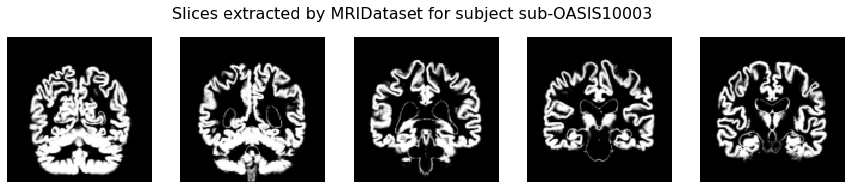

In [0]:
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import rotate

subject = 'sub-OASIS10003'
preprocessed_pt = torch.load('OASIS-1_dataset/preprocessed/%s_ses-M00_' % subject +
                    'T1w_segm-graymatter_space-Ixi549Space_modulated-off_' +
                    'probability.pt')

def show_slices(slices, subject):
    """ Function to display a row of image slices """
    fig, axes = plt.subplots(1, len(slices), figsize=(3 * len(slices), 3))
    fig.suptitle('Slices extracted by MRIDataset for subject %s' % subject,
                 fontsize=16)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis("off")

slice_0 = preprocessed_pt[0, :, 45, :]
slice_1 = preprocessed_pt[0, :, 52, :]
slice_2 = preprocessed_pt[0, :, 60, :]
slice_3 = preprocessed_pt[0, :, 67, :]
slice_4 = preprocessed_pt[0, :, 74, :]
show_slices([slice_0, slice_1, slice_2, slice_3, slice_4], subject)
plt.show()

## 2.2 Train and test functions

Main difference with previous lab, the training loss is estimated from batch seen during the epochs instead of testing the whole dataset at the end of the epoch.

In [0]:
def train(model, train_loader, criterion, optimizer, n_epochs):
    """
    Method used to train a CNN
    
    Args:
        model: (nn.Module) the neural network
        train_loader: (DataLoader) a DataLoader wrapping a MRIDataset
        criterion: (nn.Module) a method to compute the loss of a mini-batch of images
        optimizer: (torch.optim) an optimization algorithm
        n_epochs: (int) number of epochs performed during training

    Returns:
        best_model: (nn.Module) the trained neural network
    """
    best_model = deepcopy(model)
    train_best_loss = np.inf

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        t0 = time()
        for i, data in enumerate(train_loader, 0):
            images, labels = data['image'].cuda(), data['label'].cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            total_loss += loss.item()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader.dataset)
        print('Epoch %i: loss = %f' % (epoch, mean_loss))

        if mean_loss < train_best_loss:
            best_model = deepcopy(model)
            train_best_loss = mean_loss
    
    return best_model

def test(model, data_loader, criterion):
    """
    Method used to test a CNN
    
    Args:
        model: (nn.Module) the neural network
        data_loader: (DataLoader) a DataLoader wrapping a MRIDataset
        criterion: (nn.Module) a method to compute the loss of a mini-batch of images
    
    Returns:
        results_df: (DataFrame) the label predicted for on the slice level.
        results_metrics: (dict) a set of metrics
    """
    model.eval()
    columns = ["participant_id", "slice_id", "proba0", "proba1",
               "true_label", "predicted_label"]
    results_df = pd.DataFrame(columns=columns)
    total_loss = 0
    
    with torch.no_grad():
        for i, data in enumerate(data_loader, 0):
            images, labels = data['image'].cuda(), data['label'].cuda()
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            probs = nn.Softmax(dim=1)(outputs)
            _, predicted = torch.max(outputs.data, 1)

            for idx, sub in enumerate(data['participant_id']):
                row = [sub, data['slice_id'][idx], 
                       probs[idx, 0].item(), probs[idx, 1].item(),
                       labels[idx].item(), predicted[idx].item()]
                row_df = pd.DataFrame([row], columns=columns)
                results_df = pd.concat([results_df, row_df])

    results_metrics = compute_metrics(results_df.true_label.values, results_df.predicted_label.values)
    results_df.reset_index(inplace=True, drop=True)
    results_metrics['mean_loss'] = total_loss / len(data_loader.dataset)
    
    return results_df, results_metrics


def compute_metrics(ground_truth, prediction):
    """Computes the accuracy, sensitivity, specificity and balanced accuracy"""
    tp = np.sum((prediction == 1) & (ground_truth == 1))
    tn = np.sum((prediction == 0) & (ground_truth == 0))
    fp = np.sum((prediction == 1) & (ground_truth == 0))
    fn = np.sum((prediction == 0) & (ground_truth == 1))
    
    metrics_dict = dict()
    metrics_dict['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
    
    # Sensitivity
    if tp + fn != 0:
        metrics_dict['sensitivity'] = tp / (tp + fn)
    else:
        metrics_dict['sensitivity'] = 0.0
        
    # Specificity
    if fp + tn != 0:
        metrics_dict['specificity'] = tn / (fp + tn)
    else:
        metrics_dict['specificity'] = 0.0
        
    metrics_dict['balanced_accuracy'] = (metrics_dict['sensitivity'] + metrics_dict['specificity']) / 2
    
    return metrics_dict

## 2.3 Model

As we are working with 2D inputs, we can use networks that have been pretrained on natural images. The last fully-connected layer is replaced to perform a binary classification (indeed the number of classes in the natural images dataset ImageNet is 1,000).

In [0]:
import torchvision.models as models

def create_model():
    resnet18 = models.resnet18(pretrained=True)
    resnet18.fc = nn.Linear(512, 2)
    return resnet18

## 2.4 Training binary classification (AD vs CN)

As in the previous lab, the goal will be to separate AD patients from CN participants using a CNN. This time its inputs will be slices instead of patches centered on the hippocampus.

In [0]:
#@title
%%html
<div style='background-color:rgba(255,80,80,0.4); padding:20px'>
    <b>In this lab we don't perform a cross-validation to reduce computational time. 
      However it is highly recommended to do it as deep learning methods are not deterministic and 
      give highly variable results. In this way a cross-validation procedure can help to better 
      estimate the performance and make better choices of hyperparameters.</b>
</div>

### 2.4.1 Slice-level split

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Split your data on the slice level and create two DataFrames
  <code>train_df</code> and <code>valid_df</code>.
  You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn.model_selection.train_test_split</a>
  to split your dataset into a training set and a validation set.<br>
  The dataframe comprising all training data was added on github under the path
  <code>tsv_files/lab_2/train_valid.tsv</code>.
</div>

In [0]:
from sklearn.model_selection import train_test_split

train_valid_df = pd.read_csv('OASIS-1_dataset/tsv_files/lab_2/train_valid.tsv', sep='\t')

indices_train, indices_valid = train_test_split(train_valid_df.index.values, random_state=42)
train_df = train_valid_df.loc[indices_train]
valid_df = train_valid_df.loc[indices_valid]

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Train the 2D CNN and evaluate its performance on the training and validation set. You can reuse code from
  <a href="https://colab.research.google.com/drive/1EUB_m9_0i7d1dAr0_ElbJjCXx4W4JqiF#scrollTo=spF8eq2pcGC_">the previous lab</a>.
</div>

In [0]:
from time import time

# Construction of dataset objects
img_dir = path.join('OASIS-1_dataset', 'preprocessed')
train_dataset = MRIDataset(img_dir, train_df)
valid_dataset = MRIDataset(img_dir, valid_df)

# Try different learning rates
learning_rate = 10**-4
n_epochs = 30
batch_size = 32

# Put the network on GPU
model = create_model().cuda()
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True)
criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

t= time()
best_model = train(model, train_loader, criterion, optimizer, n_epochs)
print('Execution time', time() - t)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Epoch 0: loss = 0.602100
Epoch 1: loss = 0.223857
Epoch 2: loss = 0.100696
Epoch 3: loss = 0.080611
Epoch 4: loss = 0.043855
Epoch 5: loss = 0.033362
Epoch 6: loss = 0.048903
Epoch 7: loss = 0.077016
Epoch 8: loss = 0.028058
Epoch 9: loss = 0.017720
Epoch 10: loss = 0.012655
Epoch 11: loss = 0.031071
Epoch 12: loss = 0.013761
Epoch 13: loss = 0.041895
Epoch 14: loss = 0.033481
Epoch 15: loss = 0.019159
Epoch 16: loss = 0.010930
Epoch 17: loss = 0.006540
Epoch 18: loss = 0.010505
Epoch 19: loss = 0.004507
Epoch 20: loss = 0.033564
Epoch 21: loss = 0.007634
Epoch 22: loss = 0.016407
Epoch 23: loss = 0.012216
Epoch 24: loss = 0.013841
Epoch 25: loss = 0.018170
Epoch 26: loss = 0.023467
Epoch 27: loss = 0.005697
Epoch 28: loss = 0.022993
Epoch 29: loss = 0.025224
Execution time 250.3473584651947


The results seem quite good! We can now evaluate the generalization capacity of the network on an independent test set. This set contains subjects that have never been seen during training.

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Evaluate the network on the test set. 
  Compare with the scores obtained on the validation set.
  Can you explain the difference?
</div>

In [0]:
test_df = pd.read_csv("OASIS-1_dataset/tsv_files/lab_2/test.tsv", sep="\t")

### 2.4.2 Subject-level split

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Split your data on the <b>subject level</b> and create two DataFrames
  <code>train_df</code> and <code>valid_df</code>.
</div>

In [0]:
# TODO

In [0]:
#@title
%%html
<div style='background-color:rgba(80,255,80,0.4); padding:20px'>
  <b>Exercise</b>: Repeat the training and testing steps with the subject-level split.
</div>

In [0]:
# TODO

## 2.5 Longitudinal dataset

In longitudinal studies, patients have several visits. The dataset could look like this:

In [0]:
import numpy as np
import pandas as pd

# Create a mock longitudinal dataset
n_patients = 50
n_visits = 4
n_features = 7
patients = ['Patient {}'.format(i + 1) for i in range(n_patients)]
visits = ['Visit {}'.format(i + 1) for i in range(n_visits)]
index = pd.MultiIndex.from_product([patients, visits],
                                   names=['Patient', 'Visit'])
columns = ['Feature {}'.format(i + 1) for i in range(n_features)]
df = pd.DataFrame(data=np.random.randn(len(index), n_features),
                  index=index, columns=columns)
df

Feature 1  Feature 2  ...  Feature 6  Feature 7
Patient    Visit                          ...                      
Patient 1  Visit 1   1.414233   1.206849  ...   0.210629   0.364885
           Visit 2   1.432548  -1.412059  ...   0.117327   0.656583
           Visit 3  -1.035589   0.667195  ...  -0.865418  -1.054529
           Visit 4   0.136789  -2.031230  ...   1.225170   0.000267
Patient 2  Visit 1   2.103491   0.896090  ...  -0.727043  -0.580906
...                       ...        ...  ...        ...        ...
Patient 49 Visit 4  -1.430616   0.011135  ...   1.531468   0.264129
Patient 50 Visit 1  -0.208637  -0.127974  ...  -0.889356   0.160558
           Visit 2  -1.009742  -0.777867  ...   1.433321   0.915264
           Visit 3  -1.077750   0.547783  ...  -0.913671  -0.181098
           Visit 4  -1.118015  -1.645561  ...  -0.641026   1.008873

[200 rows x 7 columns]

It is important to split the data set at the patient level, that is all the visits of a given patient belong to one and only set. Why? Because in practice, you will not retrain your model everytime a patient has a new visit. You want your model to be able to generalize for new patients, not only for new visits of patients that were used when fitting the model.

## 2.6 Conclusion

In [0]:
#@title
%%html
<div style='background-color:rgba(255,80,80,0.4); padding:20px'>
    <b>Take-home message: You must always perform cross-validation at the patient (i.e. sample) level:
      all the observations of a given patient must belong to one and only one set.</b>
</div>

# 3. Interpretability

**This section is not an exercise but rather a set of guidelines and pointers to ressources that we advise you to read at least once.**

## 3.1 Machine learning

In many cases, especially medical applications, it is important to have an idea about what the model has learned. Depending on the type of the algorithm (generalized linear model, tree-based algorithm), you can have access to different information.

**(a)** For generalized linear models (linear regression, logistic regression, SVM with a linear kernel, etc.), one can get the coefficients for each feature:
$$ f(x) = f\left( \beta_0 + \sum_{k=1}^K \beta_k x^{(k)}  \right) $$
You can get them via the `intercept_` and `coef_` attributes of a fitted `scikit-learn` estimator.

**(b)** For kernel methods (SVM, Kernel Ridge regression, etc.), one can get the coefficients for each sample in the training set:
$$ f(x) = \beta_0 + \sum_{i=1}^n \beta_i K(x, x_i) $$

You can get them via the `intercept_` and `dual_coef_` attributes of a fitted `scikit-learn` estimator.

**(c)** Tree-based estimators can compute [feature importance scores](https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation) that represent how much each feature contributes to the predictions:

> The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

In [0]:
#@title
%%html
<div style='background-color:rgba(255,80,80,0.4); padding:20px'>
  <b>Important: The coefficients or feature importance scores depend on the entire dataset:
    if you remove one feature or one sample, you may get different results.</b>
</div>

Section 4 of the user guide of `scikit-learn` provides interesting information regarding interpretability:
* [4. Inspection](https://scikit-learn.org/stable/inspection.html)
* [4.1. Partial dependence plots](https://scikit-learn.org/stable/modules/partial_dependence.html)
* [4.2. Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html)

## 3.2 Deep learning

Many interpretability methods have been proposed to understand deep learning systems' decisions. You will find [here](https://github.com/utkuozbulak/pytorch-cnn-visualizations) some implementations in pytorch and sources. 

# 4. Optional: making your own functions/classes for cross-validation

In this lab, we used utilities from the `scikit-learn` package to perform cross-validation. Since *practice makes perfect*, it can be useful to implement some of them yourself as an exercice. In the following sections, you have to complete the functions to implement each algorithm, and some tests are provided to make sure that your implementation behaves as expected.

## 4.1 Shuffle split

In [0]:
def shuffle_split(n_splits=10, n_samples=100, test_size=0.2, random_state=None):
    """Shuffle split cross-validation.
    
    Provides train/test indices to split data in training and test sets.
    
    Parameters
    ----------
    n_splits : int (default = 10)
        Number of splits into training and test sets.

    n_samples : int (default = 100)
        Number of samples in the dataset.
    
    test_size : int (default = 0.2)
        Proportion of the dataset to include in the test set. Must be between 0 and 1.
    
    random_state : None or int (default = None)
        If int, random_state is the seed used by the random number generator.
    
    Returns
    -------
    splits : list of 2-tuple
        Training and test indices for each split. The length of this list
        must be equal to n_splits.

    """
    # TODO

In [0]:
def test_shuffle_split():

    # Parameters
    n_splits = 15
    n_samples = 200
    test_size = 0.32
    random_state = 42

    splits = shuffle_split(n_splits, n_samples, test_size, random_state)

    # Check the length of the list
    assert len(splits) == n_splits

    # For each split
    for train_idx, test_idx in splits:

        # Check the size of the training and test sets
        assert train_idx.size == n_samples * (1 - test_size)
        assert test_idx.size == n_samples * test_size

        # Check that the intersection of both sets is empty
        assert np.intersect1d(train_idx, test_idx).size == 0

    # Check that calling a second time the function gives the same results
    splits_new = shuffle_split(n_splits, n_samples, test_size, random_state)
    for (train_idx, test_idx), (train_idx_new, test_idx_new) in zip(splits, splits_new):
        np.testing.assert_array_equal(train_idx, train_idx_new)
        np.testing.assert_array_equal(test_idx, test_idx_new)
        
        
test_shuffle_split()

## 4.2 Stratified shuffle split

In [0]:
def stratified_shuffle_split(y, n_splits=10, test_size=0.2, random_state=None):
    """Stratified shuffle split cross-validation.
    
    Provides train/test indices to split data in training and test sets.
    The distribution of the classes must be identical in the training
    and test sets.
    
    Parameters
    ----------
    y : array, shape = (n_samples,)
        Class labels.
        
    n_splits : int (default = 10)
        Number of splits into training and test sets.
    
    test_size : int (default = 0.2)
        Proportion of the dataset to include in the test set. Must be between 0 and 1.
    
    random_state : None or int (default = None)
        If int, random_state is the seed used by the random number generator.
    
    Returns
    -------
    splits : list of 2-tuple
        Training and test indices for each split. The length of this list
        must be equal to n_splits.

    """
    # TODO

In [0]:
def test_stratified_shuffle_split():

    # Parameters
    y = np.asarray([0] * 50 + [1] * 50 + [2] * 50 + [3] * 50)
    n_samples = y.size
    n_splits = 15
    test_size = 0.32
    random_state = 42

    splits = stratified_shuffle_split(y, n_splits, test_size, random_state)

    # Check the length of the list
    assert len(splits) == n_splits

    # For each split
    for train_idx, test_idx in splits:

        # Check the size of the training and test sets
        assert train_idx.size == n_samples * (1 - test_size)
        assert test_idx.size == n_samples * test_size

        # Check that the intersection of both sets is empty
        assert np.intersect1d(train_idx, test_idx).size == 0
        
        # Check that all sets are stratified
        _, freq = np.unique(y, return_counts=True)
        _, freq_train = np.unique(y[train_idx], return_counts=True)
        _, freq_test = np.unique(y[test_idx], return_counts=True)
        np.testing.assert_allclose(freq_train / train_idx.size, freq_test / test_idx.size)
        np.testing.assert_allclose(freq / y.size, freq_test / test_idx.size)

    # Check that calling a second time the function gives the same results
    splits_new = stratified_shuffle_split(y, n_splits, test_size, random_state)
    for (train_idx, test_idx), (train_idx_new, test_idx_new) in zip(splits, splits_new):
        np.testing.assert_array_equal(train_idx, train_idx_new)
        np.testing.assert_array_equal(test_idx, test_idx_new)
        
        
test_stratified_shuffle_split()

## 4.3 K-fold

In [0]:
def kfold(n_folds=5, n_samples=100, shuffle=True, random_state=None):
    """K-fold cross-validation.
    
    Provides train/test indices to split data in training and test sets.
    
    Parameters
    ----------
    n_folds : int (default = 5)
        Number of folds.
    
    n_samples : int (default = 100)
        Number of samples in the dataset.
    
    shuffle : bool (default = True)
        If True, the data set is shuffled before splitting it into k folds.
    
    random_state : None or int (default = None)
        If int, random_state is the seed used by the random number generator.
    
    Returns
    -------
    splits : list of 2-tuple
        Training and test indices for each split. The length of this list
        must be equal to n_folds.

    """
    # TODO

In [0]:
def test_kfold():

    # Parameters
    n_folds = 5
    n_samples = 200
    shuffle = True
    random_state = 42

    splits = kfold(n_folds, n_samples, shuffle, random_state)

    # Check the length of the list
    assert len(splits) == n_folds
    
    train_idx_all, test_idx_all = [], []

    # For each split
    for train_idx, test_idx in splits:
        
        train_idx_all.append(train_idx)
        test_idx_all.append(test_idx)

        # Check the size of the training and test sets
        assert train_idx.size == n_samples * (1 - (1 / n_folds))
        assert test_idx.size == n_samples / n_folds

        # Check that the intersection of both sets is empty
        assert np.intersect1d(train_idx, test_idx).size == 0
    
    # Check that each index is in the training set 4 times and in the test set 1 time
    count_train = np.bincount(np.concatenate(train_idx_all))
    count_test = np.bincount(np.concatenate(test_idx_all))
    
    np.testing.assert_array_equal(count_train, np.full(n_samples, n_folds - 1))
    np.testing.assert_array_equal(count_test, np.ones(n_samples))

    # Check that calling a second time the function gives the same results
    splits_new = kfold(n_folds, n_samples, shuffle, random_state)
    for (train_idx, test_idx), (train_idx_new, test_idx_new) in zip(splits, splits_new):
        np.testing.assert_array_equal(train_idx, train_idx_new)
        np.testing.assert_array_equal(test_idx, test_idx_new)
        
        
test_kfold()

## 4.4 Group K-fold

In [0]:
def group_kfold(groups, n_folds=5, shuffle=True, random_state=None):
    """K-fold cross-validation.
    
    Provides train/test indices to split data in training and test sets.
    
    Parameters
    ----------
    groups : array, shape = (n_samples,)
        Group each sample belongs to.
    
    n_folds : int (default = 5)
        Number of folds.
    
    shuffle : bool (default = True)
        If True, the data set is shuffled before splitting it into k folds.
    
    random_state : None or int (default = None)
        If int, random_state is the seed used by the random number generator.
    
    Returns
    -------
    splits : list of 2-tuple
        Training and test indices for each split. The length of this list
        must be equal to n_folds.

    """
    # TODO

In [0]:
def test_group_kfold():

    # Parameters
    groups = np.repeat(np.arange(20), 5)
    n_samples = groups.size
    n_folds = 5
    shuffle = True
    random_state = 42

    splits = group_kfold(groups, n_folds, shuffle, random_state)

    # Check the length of the list
    assert len(splits) == n_folds
    
    train_idx_all, test_idx_all = [], []

    # For each split
    for train_idx, test_idx in splits:
        
        train_idx_all.append(train_idx)
        test_idx_all.append(test_idx)

        # Check the size of the training and test sets
        assert train_idx.size == n_samples * (1 - (1 / n_folds))
        assert test_idx.size == n_samples / n_folds

        # Check that the intersection of both sets is empty
        assert np.intersect1d(train_idx, test_idx).size == 0
        
        # Check that the inserction of both sets of groups is empty
        assert np.intersect1d(groups[train_idx], groups[test_idx]).size == 0
    
    # Check that each index is in the training set 4 times and in the test set 1 time
    count_train = np.bincount(np.concatenate(train_idx_all))
    count_test = np.bincount(np.concatenate(test_idx_all))
    
    np.testing.assert_array_equal(count_train, np.full(n_samples, n_folds - 1))
    np.testing.assert_array_equal(count_test, np.ones(n_samples))

    # Check that calling a second time the function gives the same results
    splits_new = group_kfold(groups, n_folds, shuffle, random_state)
    for (train_idx, test_idx), (train_idx_new, test_idx_new) in zip(splits, splits_new):
        np.testing.assert_array_equal(train_idx, train_idx_new)
        np.testing.assert_array_equal(test_idx, test_idx_new)
        
        
test_group_kfold()